In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [11]:
data=pd.read_excel("/content/Dataset.xlsx")

In [12]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01    Delhi     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02    Delhi      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03    Delhi     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04    Delhi      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05    Delhi     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
145456 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
145457 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
145458 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
145459 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0                W           44.0          W  ...        71.0         22.0   
1              WNW           44.0        NNW  ...        44.0         25.0   
2              WSW           46.0          W  ...        38.0         30.0   
3               NE           24.0         SE  ...        45.0         16.0   
4                W           41.0        ENE  ...        82.0         33.0   
...            ...            ...        ...  ...         ...          ...   
145455           E           31.0         SE  ...        51.0         24.0   
145456         NNW           22.0         SE  ...        56.0         21.0   
145457           N           37.0         SE  ...        53.0         24.0   
145458          SE           28.0        SSE  ...        51.0         24.0   
145459         NaN            NaN        ESE  ...        62.0         36.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145455       1024.6       1020.3       NaN       NaN     10.1     22.4   
145456       1023.5       1019.1       NaN       NaN     10.9     24.5   
145457       1021.0       1016.8       NaN       NaN     12.5     26.1   
145458       1019.4       1016.5       3.0       2.0     15.1     26.0   
145459       1020.2       1017.9       8.0       8.0     15.0     20.9   

        RainToday  RainTomorrow  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  
...           ...           ...  
145455         No            No  
145456         No            No  
145457         No            No  
145458         No            No  
145459         No           NaN  

[145460 rows x 23 columns]

In [ ]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

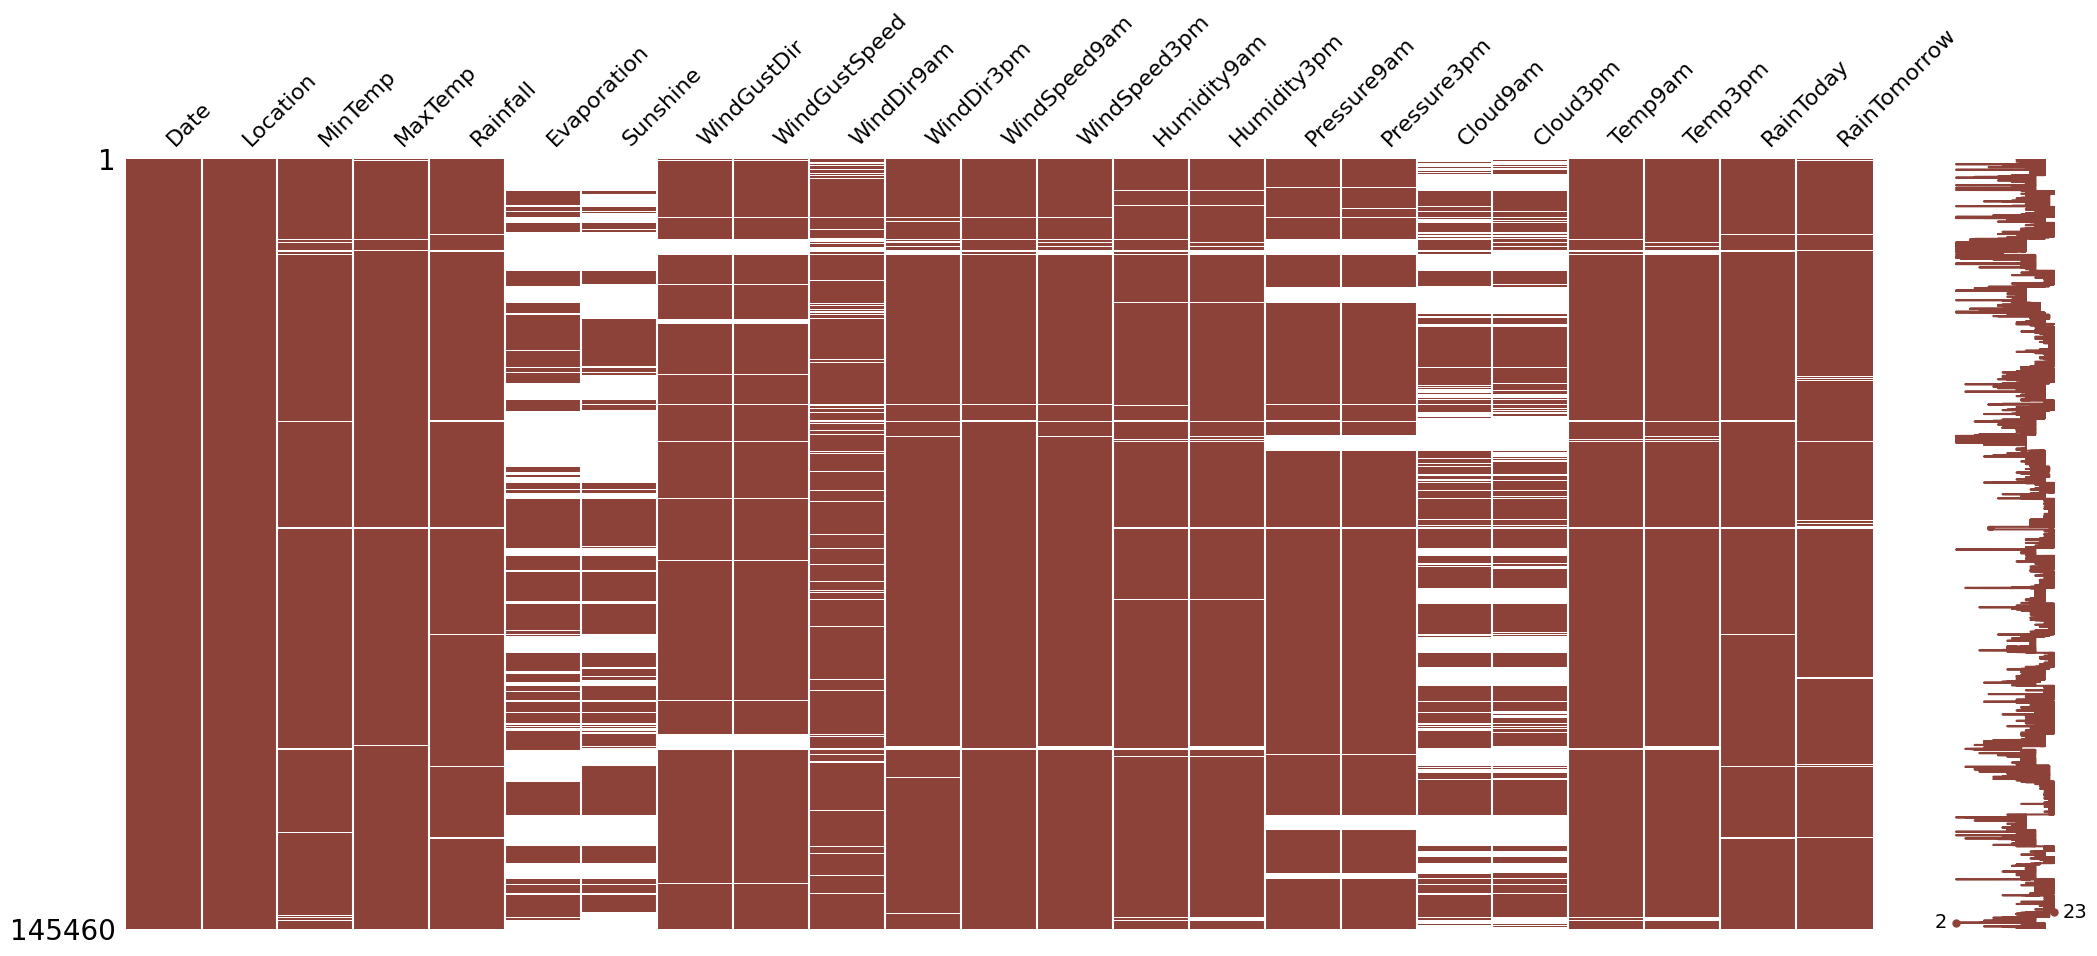

In [ ]:
import missingno as msno
msno.matrix(data,color=(0.55,0.255,0.225),fontsize=16)

In [ ]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat = data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']]
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustSpeed  135197 non-null  float64       
 6   WindSpeed9am   143693 non-null  float64       
 7   WindSpeed3pm   142398 non-null  float64       
 8   Humidity9am    142806 non-null  float64       
 9   Humidity3pm    140953 non-null  float64       
 10  Pressure9am    130395 non-null  float64       
 11  Pressure3pm    130432 non-null  float64       
 12  Temp9am        143693 non-null  float64       
 13  Temp3pm        141851 non-null  float64       
 14  RainTomorrow   142193 non-null  object        
dtype

In [ ]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
WindGustSpeed     True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Temp9am           True
Temp3pm           True
RainTomorrow      True
dtype: bool

In [ ]:
#filling the missing data of numeric variables with mean data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)

data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['Rainfall'].fillna (data['Rainfall'].mean(), inplace=True)

data['WindGustSpeed'].fillna (data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)

data['WindSpeed3pm' ].fillna (data['WindSpeed3pm'].mean(), inplace=True)

data['Humidity9am'].fillna (data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna (data['Humidity3pm' ].mean(), inplace=True)

data['Pressure9am'].fillna (data['Pressure9am'].mean(), inplace=True)

data['Pressure3pm'].fillna (data['Pressure3pm'].mean(), inplace=True)

data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [ ]:
#loading the names of categorical columns
cat_names = data_cat.columns

In [ ]:
#initializing the simple imputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [ ]:
#fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [ ]:
#converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [ ]:
#concatinating the catagorical and numerical data
data = pd.concat([data,data_cat],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustSpeed  145460 non-null  float64       
 6   WindSpeed9am   145460 non-null  float64       
 7   WindSpeed3pm   145460 non-null  float64       
 8   Humidity9am    145460 non-null  float64       
 9   Humidity3pm    145460 non-null  float64       
 10  Pressure9am    145460 non-null  float64       
 11  Pressure3pm    145460 non-null  float64       
 12  Temp9am        145460 non-null  float64       
 13  Temp3pm        145460 non-null  float64       
 14  RainTomorrow   142193 non-null  object        
 15  

In [ ]:
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainTomorrow      True
RainToday        False
WindGustDir      False
WindDir9am       False
WindDir3pm       False
dtype: bool

In [ ]:
# Remove rows with null values in column 'RainTomorrow'
data = data.dropna(subset=['RainTomorrow'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   WindGustSpeed  142193 non-null  float64       
 6   WindSpeed9am   142193 non-null  float64       
 7   WindSpeed3pm   142193 non-null  float64       
 8   Humidity9am    142193 non-null  float64       
 9   Humidity3pm    142193 non-null  float64       
 10  Pressure9am    142193 non-null  float64       
 11  Pressure3pm    142193 non-null  float64       
 12  Temp9am        142193 non-null  float64       
 13  Temp3pm        142193 non-null  float64       
 14  RainTomorrow   142193 non-null  object        
 15  

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.drop(columns=['Date'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   WindSpeed9am   142193 non-null  float64
 6   WindSpeed3pm   142193 non-null  float64
 7   Humidity9am    142193 non-null  float64
 8   Humidity3pm    142193 non-null  float64
 9   Pressure9am    142193 non-null  float64
 10  Pressure3pm    142193 non-null  float64
 11  Temp9am        142193 non-null  float64
 12  Temp3pm        142193 non-null  float64
 13  RainTomorrow   142193 non-null  object 
 14  RainToday      142193 non-null  object 
 15  WindGustDir    142193 non-null  object 
 16  WindDir9am     142193 non-null  object 
 17  WindDir3pm     142193 non-nul

In [ ]:

# List of columns to label encode
columns_to_encode = ['Location', 'RainToday', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']

# Initialize the LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.corr()

Location   MinTemp   MaxTemp  Rainfall  WindGustSpeed  \
Location       1.000000 -0.007974 -0.022592 -0.003950       0.070835   
MinTemp       -0.007974  1.000000  0.733919  0.103315       0.173361   
MaxTemp       -0.022592  0.733919  1.000000 -0.074204       0.066298   
Rainfall      -0.003950  0.103315 -0.074204  1.000000       0.127263   
WindGustSpeed  0.070835  0.173361  0.066298  0.127263       1.000000   
WindSpeed9am   0.078559  0.174938  0.014580  0.085981       0.577790   
WindSpeed3pm   0.064762  0.174187  0.050374  0.056766       0.658334   
Humidity9am   -0.001775 -0.232382 -0.499789  0.221395      -0.209226   
Humidity3pm    0.011599  0.005930 -0.499714  0.249617      -0.025751   
Pressure9am    0.036228 -0.424336 -0.309077 -0.159677      -0.426586   
Pressure3pm    0.046343 -0.434021 -0.397412 -0.120366      -0.384622   
Temp9am       -0.017814  0.897998  0.880085  0.011385       0.146761   
Temp3pm       -0.025197  0.699824  0.969733 -0.077555       0.032245   
RainTomorrow  -0.003598  0.083718 -0.159087  0.236882       0.225288   
RainToday     -0.004966  0.055644 -0.226474  0.500279       0.148264   
WindGustDir   -0.004375 -0.136317 -0.212210  0.044855       0.137914   
WindDir9am    -0.004820 -0.029638 -0.212589  0.085140       0.074638   
WindDir3pm     0.008995 -0.158958 -0.181344  0.047905       0.136674   
year           0.022467  0.039125  0.058300 -0.009241      -0.031477   
month         -0.008214 -0.203827 -0.164435 -0.030711       0.058872   
day           -0.000098  0.001504 -0.000494  0.001129      -0.008922   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.078559      0.064762    -0.001775     0.011599   
MinTemp            0.174938      0.174187    -0.232382     0.005930   
MaxTemp            0.014580      0.050374    -0.499789    -0.499714   
Rainfall           0.085981      0.056766     0.221395     0.249617   
WindGustSpeed      0.577790      0.658334    -0.209226    -0.025751   
WindSpeed9am       1.000000      0.513067    -0.269031    -0.031001   
WindSpeed3pm       0.513067      1.000000    -0.144264     0.015782   
Humidity9am       -0.269031     -0.144264     1.000000     0.659865   
Humidity3pm       -0.031001      0.015782     0.659865     1.000000   
Pressure9am       -0.215159     -0.277469     0.131593    -0.025781   
Pressure3pm       -0.165038     -0.239725     0.176164     0.048554   
Temp9am            0.128769      0.162143    -0.471141    -0.217573   
Temp3pm            0.005023      0.028444    -0.492441    -0.555778   
RainTomorrow       0.090527      0.086913     0.255162     0.439685   
RainToday          0.100563      0.078361     0.348843     0.370561   
WindGustDir        0.009762      0.084012     0.067956     0.063964   
WindDir9am         0.109916      0.111072     0.088842     0.148893   
WindDir3pm         0.050200      0.089824     0.026077    -0.007182   
year              -0.021516     -0.032348     0.010645    -0.008944   
month              0.050779      0.060409    -0.090081    -0.018315   
day               -0.009140     -0.009879     0.015512     0.013039   

               Pressure9am  ...   Temp9am   Temp3pm  RainTomorrow  RainToday  \
Location          0.036228  ... -0.017814 -0.025197     -0.003598  -0.004966   
MinTemp          -0.424336  ...  0.897998  0.699824      0.083718   0.055644   
MaxTemp          -0.309077  ...  0.880085  0.969733     -0.159087  -0.226474   
Rainfall         -0.159677  ...  0.011385 -0.077555      0.236882   0.500279   
WindGustSpeed    -0.426586  ...  0.146761  0.032245      0.225288   0.148264   
WindSpeed9am     -0.215159  ...  0.128769  0.005023      0.090527   0.100563   
WindSpeed3pm     -0.277469  ...  0.162143  0.028444      0.086913   0.078361   
Humidity9am       0.131593  ... -0.471141 -0.492441      0.255162   0.348843   
Humidity3pm      -0.025781  ... -0.217573 -0.555778      0.439685   0.370561   
Pressure9am       1.000000  ... -0.397746 -0.266291     -0.234027  

<Axes: >

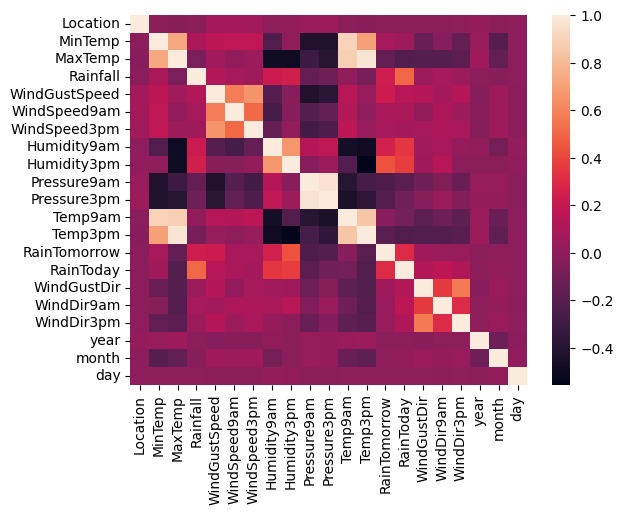

In [ ]:
cor = data.corr()
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

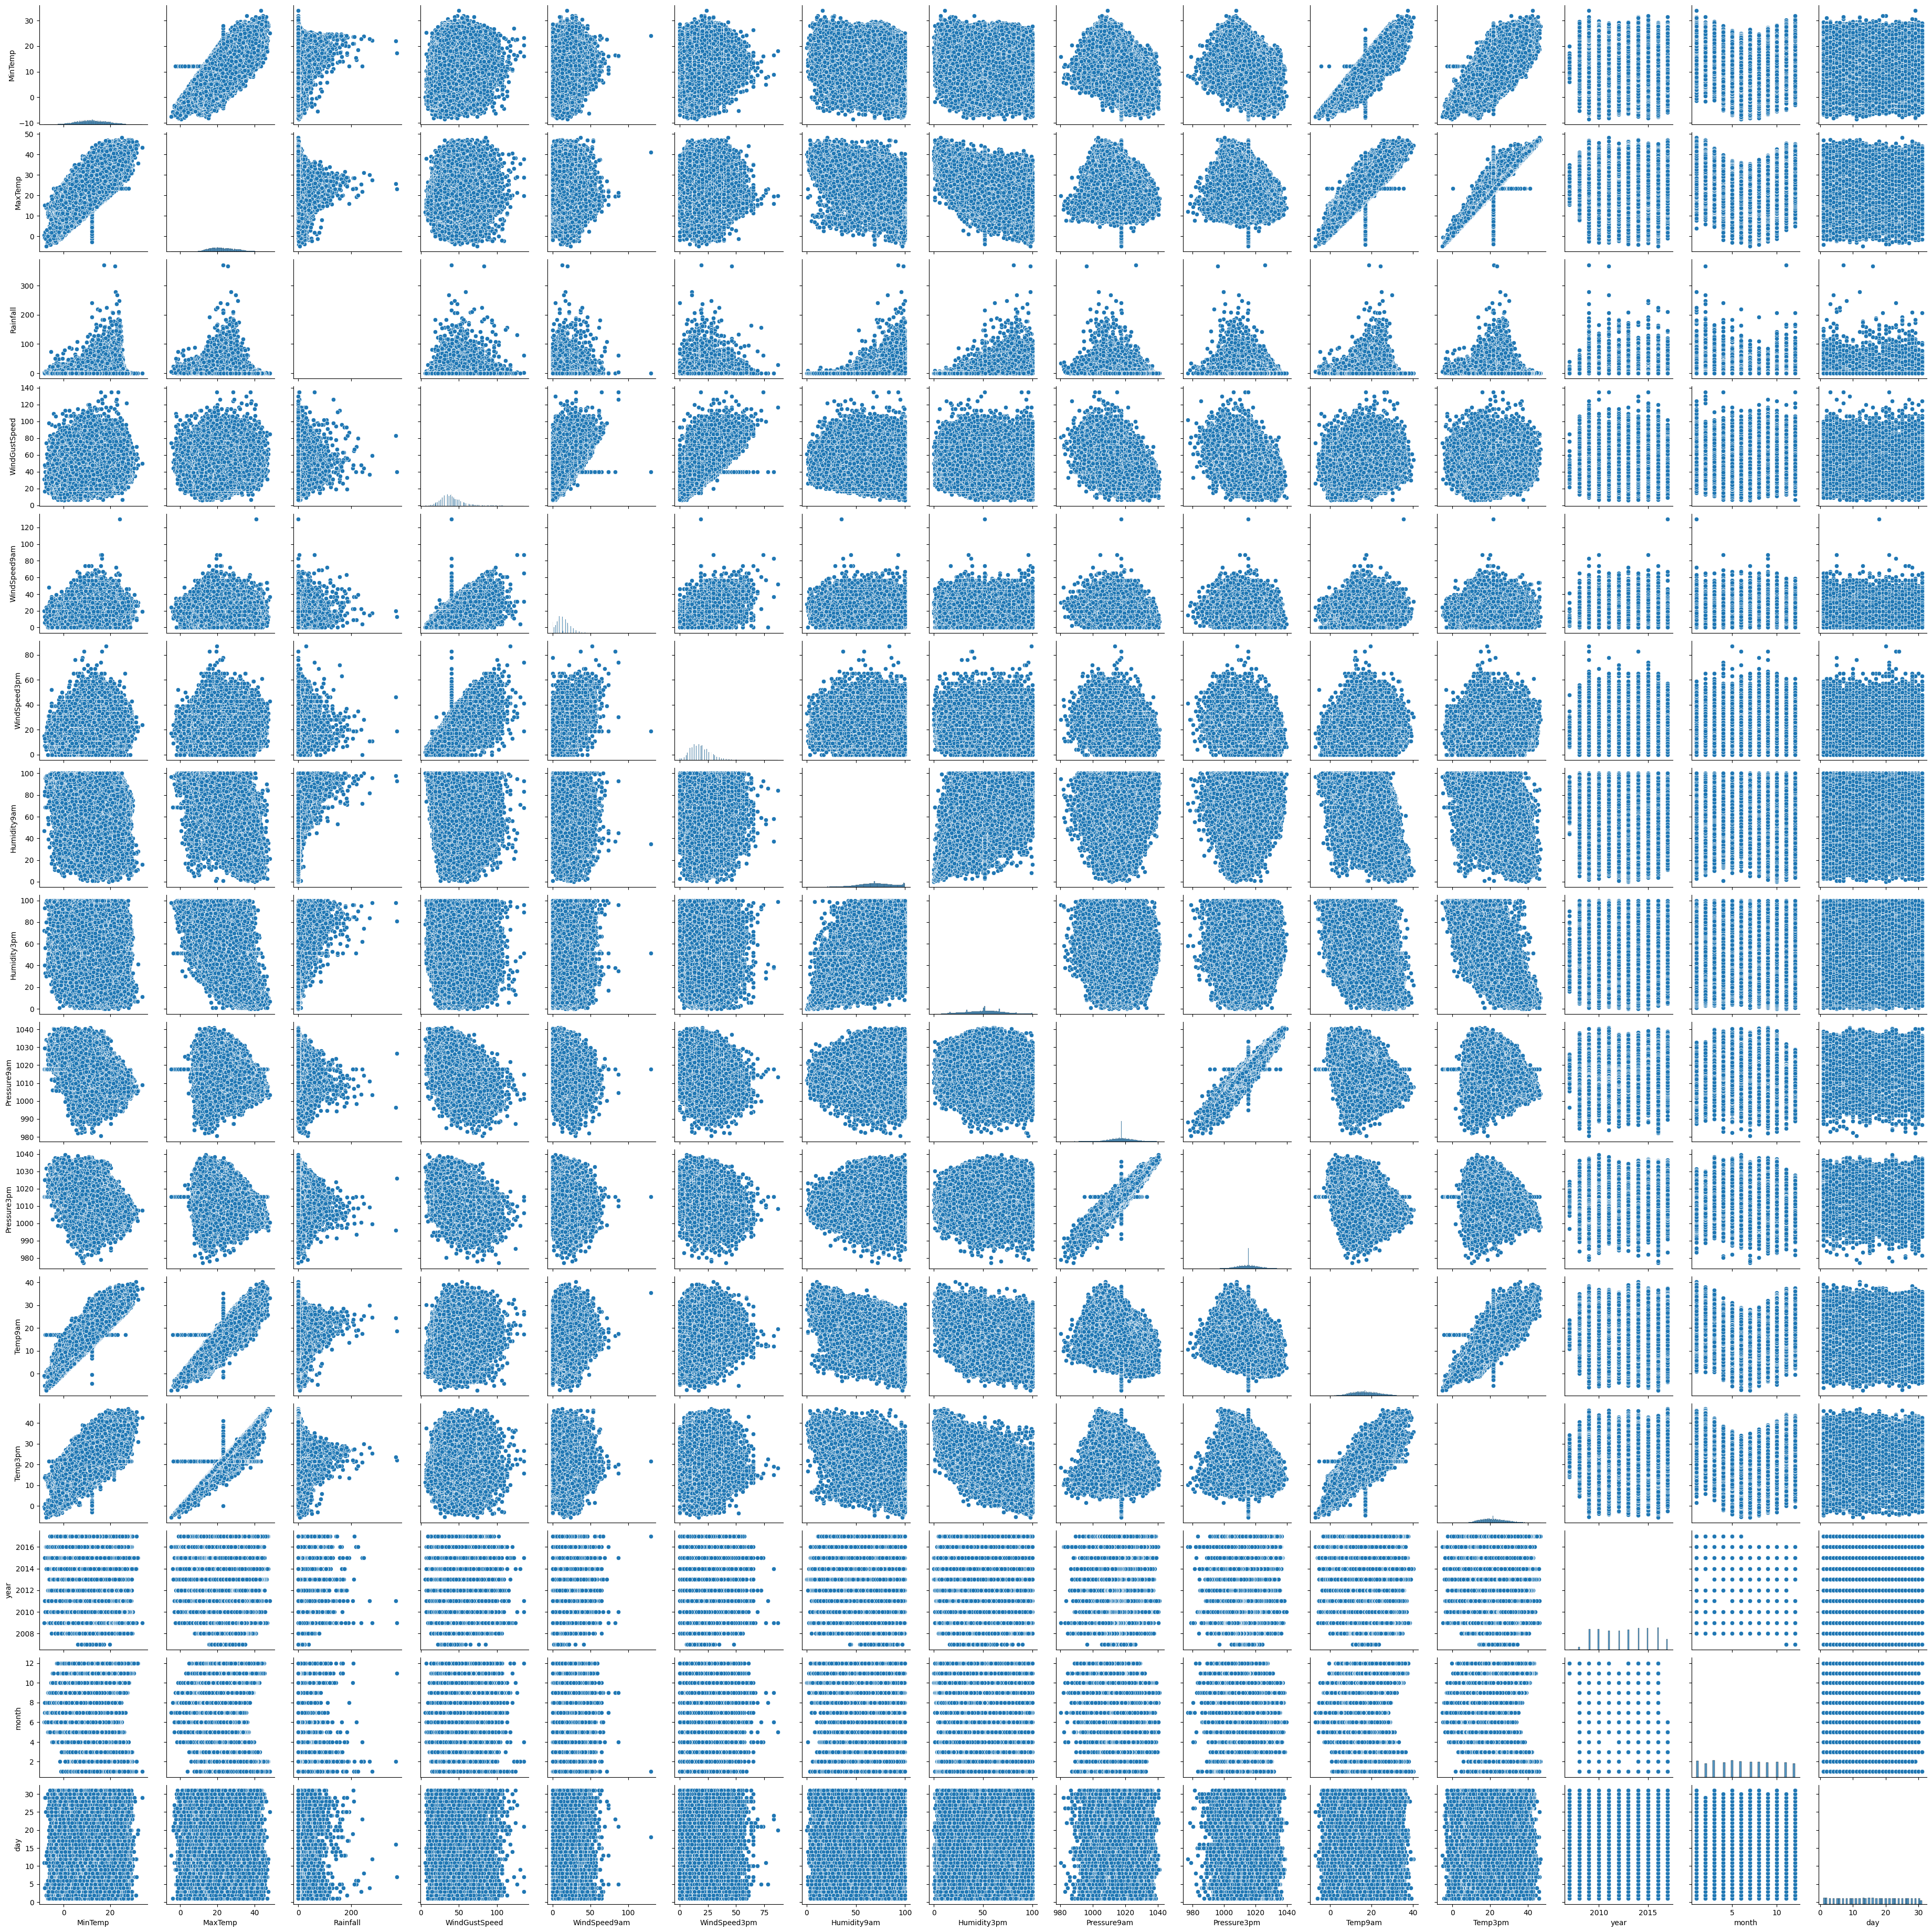

In [ ]:
sns.pairplot(data)

<Axes: >

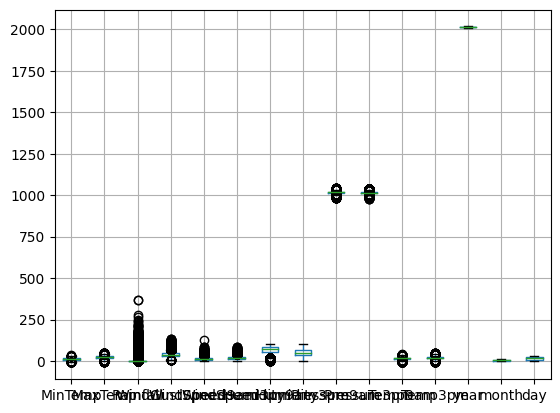

In [ ]:
data.boxplot()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#splitting x and y values
y= data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [ ]:
x

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0             14     13.4     22.9       0.6           44.0          20.0   
1             14      7.4     25.1       0.0           44.0           4.0   
2             14     12.9     25.7       0.0           46.0          19.0   
3             14      9.2     28.0       0.0           24.0          11.0   
4             14     17.5     32.3       1.0           41.0           7.0   
...          ...      ...      ...       ...            ...           ...   
145454        42      3.5     21.8       0.0           31.0          15.0   
145455        42      2.8     23.4       0.0           31.0          13.0   
145456        42      3.6     25.3       0.0           22.0          13.0   
145457        42      5.4     26.9       0.0           37.0           9.0   
145458        42      7.8     27.0       0.0           28.0          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
145454          13.0         59.0         27.0       1024.7       1021.2   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   

        Temp9am  Temp3pm  RainToday  WindGustDir  WindDir9am  WindDir3pm  \
0          16.9     21.8          0           13          13          14   
1          17.2     24.3          0           14           6          15   
2          21.0     23.2          0           15          13          15   
3          18.1     26.5          0            4           9           0   
4          17.8     29.7          0           13           1           7   
...         ...      ...        ...          ...         ...         ...   
145454      9.4     20.9          0            0           2           0   
145455     10.1     22.4          0            0           9           1   
145456     10.9     24.5          0            6           9           3   
145457     12.5     26.1          0            3           9          14   
145458     15.1     26.0          0            9          10           3   

        year  month  day  
0       2008     12    1  
1       2008     12    2  
2       2008     12    3  
3       2008     12    4  
4       2008     12    5  
...      ...    ...  ...  
145454  2017      6   20  
145455  2017      6   21  
145456  2017      6   22  
145457  2017      6   23  
145458  2017      6   24  

[142193 rows x 20 columns]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   WindSpeed9am   142193 non-null  float64
 6   WindSpeed3pm   142193 non-null  float64
 7   Humidity9am    142193 non-null  float64
 8   Humidity3pm    142193 non-null  float64
 9   Pressure9am    142193 non-null  float64
 10  Pressure3pm    142193 non-null  float64
 11  Temp9am        142193 non-null  float64
 12  Temp3pm        142193 non-null  float64
 13  RainToday      142193 non-null  int64  
 14  WindGustDir    142193 non-null  int64  
 15  WindDir9am     142193 non-null  int64  
 16  WindDir3pm     142193 non-null  int64  
 17  year           142193 non-nul

In [ ]:
names = x.columns

In [ ]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'year', 'month', 'day'],
      dtype='object')

In [ ]:

# # List of columns to label encode
# columns_to_encode = ['Location', 'RainToday', 'WindGustDir','WindDir9am','WindDir3pm']

# # Initialize the LabelEncoder
# label_encoder = preprocessing.LabelEncoder()

# # Encode each column
# for column in columns_to_encode:
#     x[column] = label_encoder.fit_transform(x[column])

In [ ]:
# y['RainTomorrow'] = label_encoder.fit_transform(y['RainTomorrow'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   WindSpeed9am   142193 non-null  float64
 6   WindSpeed3pm   142193 non-null  float64
 7   Humidity9am    142193 non-null  float64
 8   Humidity3pm    142193 non-null  float64
 9   Pressure9am    142193 non-null  float64
 10  Pressure3pm    142193 non-null  float64
 11  Temp9am        142193 non-null  float64
 12  Temp3pm        142193 non-null  float64
 13  RainToday      142193 non-null  int64  
 14  WindGustDir    142193 non-null  int64  
 15  WindDir9am     142193 non-null  int64  
 16  WindDir3pm     142193 non-null  int64  
 17  year           142193 non-nul

In [ ]:
sc = StandardScaler() # initializing the standardscaler

In [ ]:
# fitting an transforming the data into standard

x = sc.fit_transform(x)

In [ ]:
x= pd.DataFrame(x,columns=names)
#scaled data turns into array format, converting them into dataframe
# msno.matrix(x)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustSpeed  142193 non-null  float64
 5   WindSpeed9am   142193 non-null  float64
 6   WindSpeed3pm   142193 non-null  float64
 7   Humidity9am    142193 non-null  float64
 8   Humidity3pm    142193 non-null  float64
 9   Pressure9am    142193 non-null  float64
 10  Pressure3pm    142193 non-null  float64
 11  Temp9am        142193 non-null  float64
 12  Temp3pm        142193 non-null  float64
 13  RainToday      142193 non-null  float64
 14  WindGustDir    142193 non-null  float64
 15  WindDir9am     142193 non-null  float64
 16  WindDir3pm     142193 non-null  float64
 17  year           142193 non-nul

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 142193 entries, 0 to 145458
Series name: RainTomorrow
Non-Null Count   Dtype
--------------   -----
142193 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB


In [ ]:
from sklearn import model_selection

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2, random_state =0)

In [ ]:
#Models intilization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = ensemble. RandomForestClassifier()
svm = svm.SVC()
Dtree = tree.DecisionTreeClassifier()
GBM = ensemble.GradientBoostingClassifier()
log = linear_model.LogisticRegression()

In [ ]:
# fitting the model
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
svm.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# predicting the train values
p1 = XGBoost.predict(x_train)
P2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
P6 = log.predict(x_train)